In [48]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [49]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [50]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [51]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [52]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [53]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [55]:
store.close()
store_repeat.close()

In [56]:
overlaps = pd.read_hdf("../storage/encode_overlaps.hdf", "filtered_hg19_DNase_H3K27ac_FANTOM_overlapped")

In [57]:
overlaps.drop_duplicates('name', inplace=True)

In [58]:
len(overlaps)

1785580

In [64]:
counter = 0

for key in keys:
    if not key.endswith("_bed"):
        continue
    elif key == '/filtered_hg19_DNase_H3K27ac_bed':
        continue
    print(key)
    counter = counter + len(pd.read_hdf("../storage/encode_staging.hdf", key))

/CL_0000047_hg19_DNase_H3K27ac_bed
/CL_0000084_hg19_DNase_H3K27ac_bed
/CL_0000127_hg19_DNase_H3K27ac_bed
/CL_0000236_hg19_DNase_H3K27ac_bed
/CL_0000312_hg19_DNase_H3K27ac_bed
/CL_0000351_hg19_DNase_H3K27ac_bed
/CL_0000515_hg19_DNase_H3K27ac_bed
/CL_0000623_hg19_DNase_H3K27ac_bed
/CL_0001054_hg19_DNase_H3K27ac_bed
/CL_0001059_hg19_DNase_H3K27ac_bed
/CL_0002327_hg19_DNase_H3K27ac_bed
/CL_0002372_hg19_DNase_H3K27ac_bed
/CL_0002551_hg19_DNase_H3K27ac_bed
/CL_0002553_hg19_DNase_H3K27ac_bed
/CL_0002618_hg19_DNase_H3K27ac_bed
/CL_1001608_hg19_DNase_H3K27ac_bed
/CL_2000045_hg19_DNase_H3K27ac_bed
/EFO_0000586_hg19_DNase_H3K27ac_bed
/EFO_0001187_hg19_DNase_H3K27ac_bed
/EFO_0001203_hg19_DNase_H3K27ac_bed
/EFO_0002067_hg19_DNase_H3K27ac_bed
/EFO_0002713_hg19_DNase_H3K27ac_bed
/EFO_0002784_hg19_DNase_H3K27ac_bed
/EFO_0002791_hg19_DNase_H3K27ac_bed
/EFO_0002824_hg19_DNase_H3K27ac_bed
/EFO_0003042_hg19_DNase_H3K27ac_bed
/EFO_0003045_hg19_DNase_H3K27ac_bed
/NTR_0000856_hg19_DNase_H3K27ac_bed
/NTR_0001

In [65]:
counter

1594916

In [8]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [9]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line'")['biosample_term_name'].unique()

array(['T47D', 'Daoy', 'HL-60', 'A549', 'RPMI8226', 'K562', 'HeLa-S3',
       'Jurkat', 'Caki2', 'KBM-7', 'Karpas-422', 'GM06990', 'NCI-H226',
       'GM12878', 'HCT116', 'MG63', 'HS-27A', 'HS-5', 'BE2C', 'WI38',
       'HepG2', 'M059J', 'WERI-Rb-1', 'MCF-7', 'LHCN-M2',
       'LNCaP clone FGC', 'PC-9', 'RCC 7860', 'DND-41', 'MM.1S', 'GM12864',
       'CMK', 'GM12865', 'OCI-LY7', 'HT-29', 'Panc1', 'A673', 'SK-N-SH',
       'G401', 'ACHN', 'Loucy', 'SK-N-MC', 'NAMALWA', 'SJSA1', 'NT2/D1',
       'RPMI-7951', 'PC-3', 'NB4', 'Caco-2', 'A172'], dtype=object)

In [10]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'K562' & method=='DNase_H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
50,ENCSR083ZZU,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[],/organisms/human/,[],ENCFF687ZGE.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac


In [11]:
encode_bed = BedTool("../download/ENCODE/ENCSR083ZZU/files/ENCFF687ZGE/ENCFF687ZGE.bed.gz")

In [12]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "Retroposon_SVA_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [13]:
encode_bed.head()

chr1	31239873	31243394	Distal-Prediction-1	1	.	31241920	31242070	255,205,0
 chr4	10179984	10189724	Distal-Prediction-2	1	.	10182940	10183090	255,205,0
 chr1	145007837	145010711	Distal-Prediction-3	1	.	145009560	145009710	255,205,0
 chr16	70460661	70465611	Distal-Prediction-4	1	.	70462120	70462270	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74080580	74080730	255,205,0
 chr1	207192997	207199938	Distal-Prediction-6	1	.	207197800	207197950	255,205,0
 chr1	145454000	145457861	Distal-Prediction-7	1	.	145455440	145455590	255,205,0
 chr1	26447785	26455587	Distal-Prediction-8	1	.	26452900	26453050	255,205,0
 chr7	106206757	106212313	Distal-Prediction-9	1	.	106209520	106209670	255,205,0
 chr1	31249026	31252753	Distal-Prediction-10	1	.	31251340	31251490	255,205,0
 

In [14]:
encode_bed.count()

36772

In [15]:
repeat_bed.count()

5420

In [16]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [17]:
encode_bed_df = encode_bed.to_dataframe()

In [18]:
# removing chroms
chroms = encode_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [19]:
repeat_bed.count()

5386

### Alu size distribution

In [20]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [21]:
# Alu size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [22]:
repeat_sizes_df = repeat_bed_df[['size']]

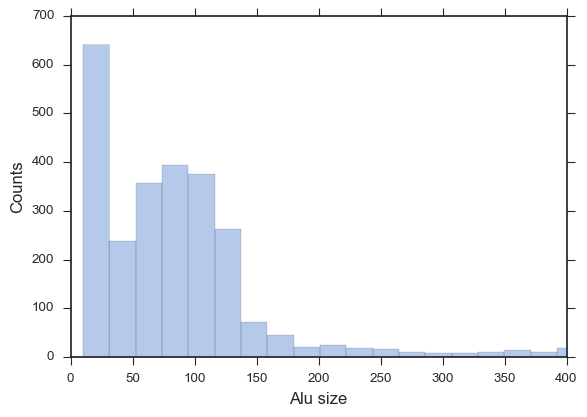

In [23]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(repeat_sizes_df, kde=False, bins=200)
ax.set_xlim(0,400)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Alu size', size=12)

In [24]:
repeat_bed_df.head()

,chrom,start,end,name,score,strand,size
0,chr1,333504,333563,RepeatMasker.0.SVA_E.361,468,.,59
1,chr1,772479,772560,RepeatMasker.1.SVA_D.967,270,.,81
2,chr1,6364454,6366296,RepeatMasker.2.SVA_D.7916,9901,.,1842
3,chr1,6774568,6776390,RepeatMasker.3.SVA_D.8689,6435,.,1822
4,chr1,7660546,7662062,RepeatMasker.4.SVA_D.10031,11216,.,1516


In [25]:
'RepeatMasker.0.AluSp.18'.split('.')[2]

'AluSp'

In [26]:
def define_subfamily(row):
    return row['name'].split('.')[2]

def define_cluster(row):
    if row['subfamily'] in ['FAM', 'FLAM_A', 'FLAM_C', 'FRAM']:
        return 'FAM-like'
    elif row['subfamily'].startswith('AluJ') or row['subfamily'] == 'Alu':
        return 'AluJ'
    elif row['subfamily'].startswith('AluY'):
        return 'AluY'
    elif row['subfamily'].startswith('AluS'):
        return 'AluS'
    else:
        print("Missing subfamily class")

In [27]:
repeat_bed_df['subfamily'] = repeat_bed_df.apply(lambda row : define_subfamily(row), axis=1)
repeat_bed_df['cluster'] = repeat_bed_df.apply(lambda row : define_cluster(row), axis=1)

In [28]:
repeat_bed_df['subfamily'].unique()

array(['AluSp', 'AluJo', 'Alu', 'AluJr', 'AluSx', 'AluSx3', 'AluYj4',
       'FLAM_A', 'AluSc', 'AluSz', 'AluSc5', 'AluYk2', 'AluY', 'AluSq',
       'AluJb', 'FAM', 'AluSq2', 'FLAM_C', 'AluSg', 'AluJr4', 'AluSg4',
       'AluSx1', 'AluSg7', 'AluSz6', 'AluYc', 'FRAM', 'AluYf1', 'AluSc8',
       'AluYa5', 'AluSx4', 'AluYe5', 'AluSq4', 'AluYc3', 'AluYh3',
       'AluYk3', 'AluYh9', 'AluYa8', 'AluYi6', 'AluYm1', 'AluYg6',
       'AluYh3a3', 'AluYb8', 'AluYh7', 'AluSq10', 'AluYk4', 'AluYe6',
       'AluYd8', 'AluYi6_4d', 'AluYk11', 'AluYb9', 'AluYk12'], dtype=object)

In [29]:
repeat_bed_df['cluster'].unique()

array(['AluS', 'AluJ', 'AluY', 'FAM-like'], dtype=object)

(0, 500)

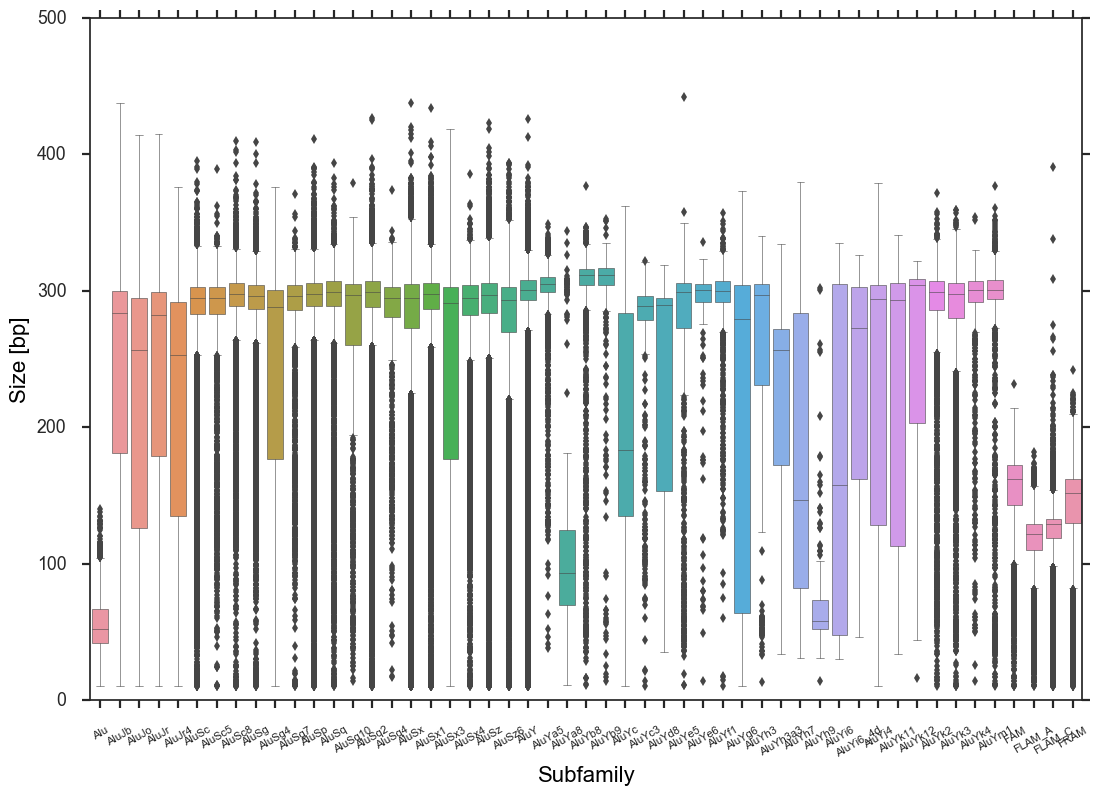

In [30]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.4})
ax = sns.boxplot(y="size", x='subfamily', data=repeat_bed_df.sort_values(by='subfamily'))
#ax.axes.set_title('ENCODE Enhancers Size Distribution', fontsize=15,color="black",alpha=0.5)
ax.axes.set_ylabel("Size [bp]",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Subfamily",size = 16,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=30, size=8)
ax.axes.set_ylim(0,500)

(0, 600)

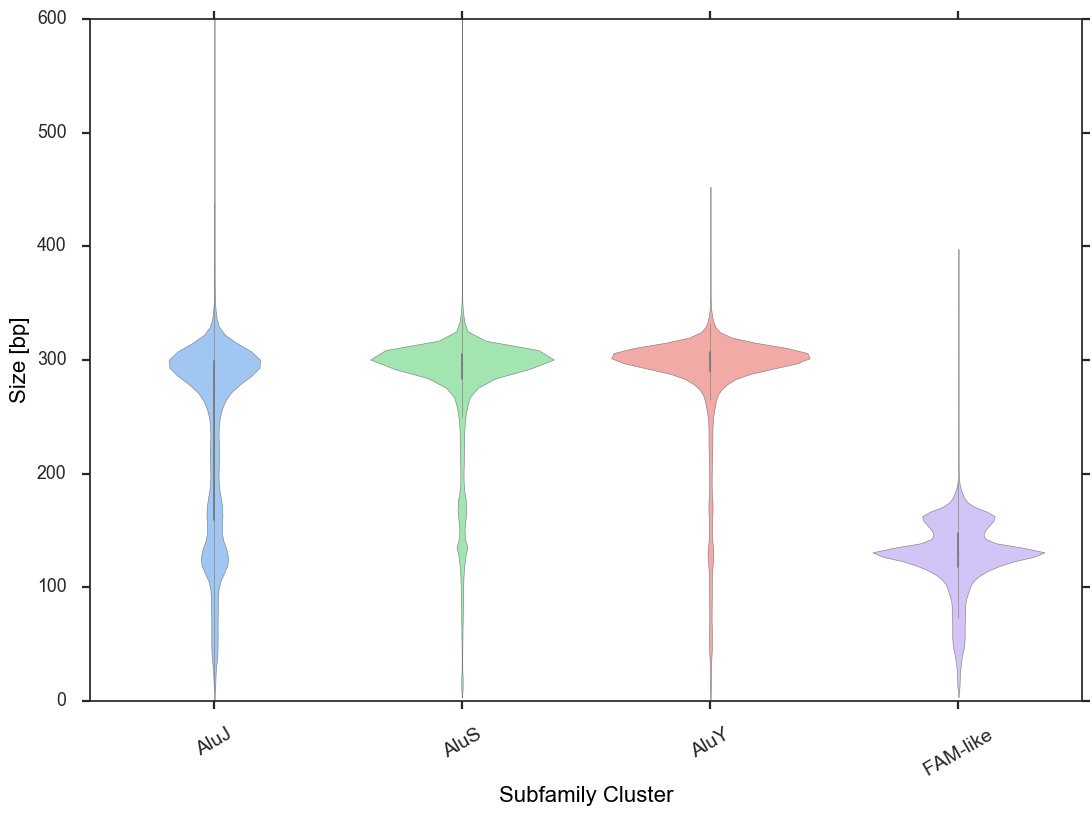

In [31]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="pastel", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.4})
ax = sns.violinplot(y="size", x='cluster', data=repeat_bed_df.sort_values(by='cluster'))
#ax.axes.set_title('ENCODE Enhancers Size Distribution', fontsize=15,color="black",alpha=0.5)
ax.axes.set_ylabel("Size [bp]",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Subfamily Cluster",size = 16,color="black",alpha=1)
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=30, size=14)
ax.axes.set_ylim(0,600)

In [32]:
repeat_bed_df[['cluster', 'subfamily', 'size']].groupby(['cluster', 'subfamily']).agg(['mean', 'std', 'count']).T

cluster            AluJ                                              \
subfamily           Alu          AluJb         AluJo          AluJr   
size mean     55.690909     245.538166    215.621590     243.768215   
     std      17.691226      75.682467     87.272742      75.418911   
     count  7480.000000  114658.000000  44716.000000  111776.000000   

cluster                           AluS                             \
subfamily         AluJr4         AluSc       AluSc5        AluSc8   
size mean     218.148963    278.503614   277.602383    290.401031   
     std       81.927542     52.366349    52.391016     34.340365   
     count  12050.000000  36661.000000  4029.000000  19794.000000   

cluster                                     ...             AluY              \
subfamily          AluSg        AluSg4      ...          AluYk11     AluYk12   
size mean     288.905961    247.049110      ...       215.880952  259.424242   
     std       33.466778     69.505555      ...       106.256092   80.536225   
     count  41419.000000  11464.000000      ...       168.000000   99.000000   

cluster                                                            FAM-like  \
subfamily        AluYk2       AluYk3       AluYk4       AluYm1          FAM   
size mean    282.817291   275.731876   287.832714   288.911032   149.840009   
     std      50.932945    56.645688    45.981208    52.249697    35.242468   
     count  6431.000000  5945.000000  1076.000000  4496.000000  4219.000000   

cluster                                               
subfamily         FLAM_A        FLAM_C          FRAM  
size mean     114.046482    122.382217    138.662249  
     std       24.139575     23.985240     35.509040  
     count  14694.000000  23764.000000  19769.000000  

[3 rows x 51 columns]

In [33]:
repeat_bed_df[['cluster', 'size']].groupby(['cluster']).agg(['mean', 'std', 'count']).T

cluster              AluJ           AluS           AluY      FAM-like
size mean      234.234722     277.486776     282.371537    127.429763
     std        82.910419      54.877017      55.387403     31.061290
     count  290680.000000  677693.000000  136646.000000  62446.000000

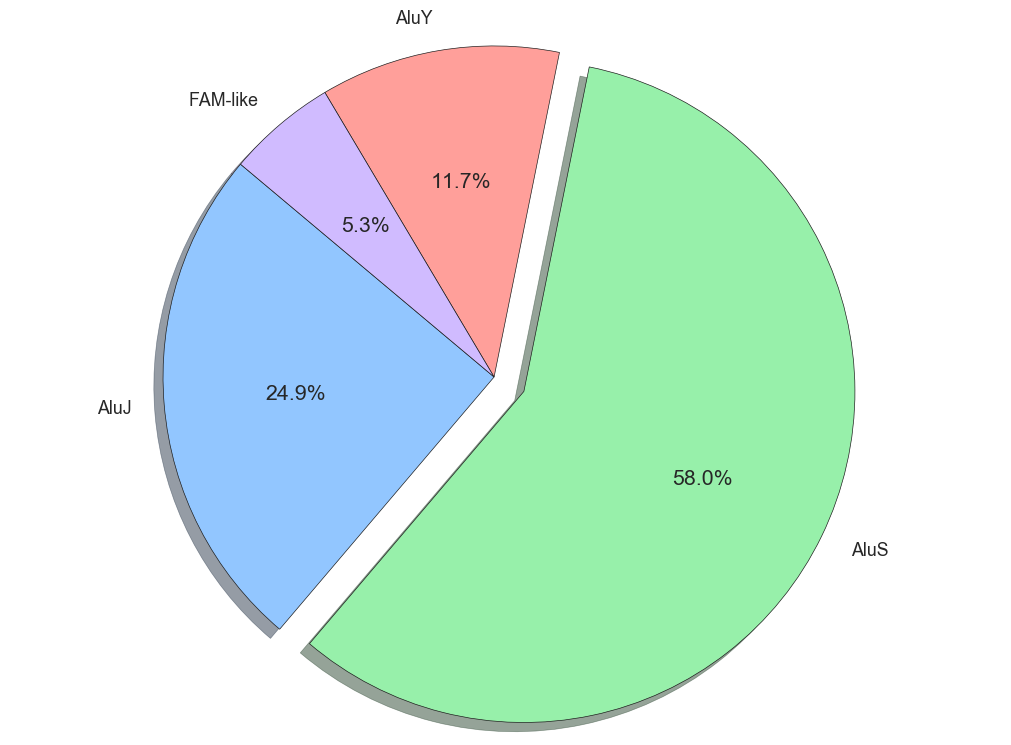

In [34]:
import matplotlib.pyplot as plt
 
# Data to plot
grouped = repeat_bed_df[['cluster', 'size']].groupby(['cluster']).agg(['mean', 'std', 'count'])
labels = grouped.index.values
counts = grouped['size']['count'].values
colors = sns.color_palette('pastel').as_hex()[:4]
explode = (0.0, 0.1, 0.0, 0.0)  # explode 1st slice
 
# Plot
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [35]:
def label_chrom(row):
    chrom_name = row['chrom']
    base = chrom_name[:3]
    
    if(len(chrom_name) > 4):
        return chrom_name
    elif(chrom_name[3] in ['X','Y']):
        return chrom_name
    else:
        return base + chrom_name[3].zfill(2)

In [36]:
repeat_bed_df['chrom_name'] = repeat_bed_df.apply(lambda row: label_chrom(row), axis=1)
repeat_bed_df.head()

,chrom,start,end,name,score,strand,size,subfamily,cluster,chrom_name
0,chr1,26791,27053,RepeatMasker.0.AluSp.18,2070,.,262,AluSp,AluS,chr01
1,chr1,31436,31733,RepeatMasker.1.AluJo.28,2059,.,297,AluJo,AluJ,chr01
2,chr1,33466,33509,RepeatMasker.2.Alu.31,233,.,43,Alu,AluJ,chr01
3,chr1,35367,35499,RepeatMasker.3.AluJr.37,1000,.,132,AluJr,AluJ,chr01
4,chr1,39624,39924,RepeatMasker.4.AluSx.42,2292,.,300,AluSx,AluS,chr01


In [37]:
#sampled_df = repeat_bed_df.sample(10)
#sampled_df.query('cluster == "AluS"')

In [38]:
pivot = pd.pivot_table(repeat_bed_df, index=["cluster"], values=["name"], columns=["chrom_name"],aggfunc=lambda x: len(x.unique()))

In [39]:
pivot

name                                                          \
chrom_name  chr01  chr02  chr03  chr04  chr05  chr06  chr07  chr08  chr09   
cluster                                                                     
AluJ        26361  20637  16261  13156  13560  13978  18609  12657  11284   
AluS        59228  48551  38730  31355  33603  34162  40463  28284  28799   
AluY        11469  10435   8410   7506   7470   7082   7703   5772   6619   
FAM-like     5937   4507   3674   3070   3090   3311   3528   2684   2504   

                   ...                                                     \
chrom_name  chr10  ...    chr14  chr15  chr16  chr17  chr18  chr19  chr20   
cluster            ...                                                      
AluJ        14696  ...     9233   9519  14083  13505   6174  14539   7544   
AluS        32336  ...    21075  22382  29647  34724  13823  35133  17122   
AluY         6202  ...     4115   4803   4821   6243   3140   5644   2846   
FAM-like     3085  ...     2129   2083   2611   2905   1372   2696   1597   

                                
chrom_name chr21  chr22   chrX  
cluster                         
AluJ        2803   5753  11907  
AluS        7391  14458  27958  
AluY        1785   3033   5130  
FAM-like     566   1145   2405  

[4 rows x 23 columns]

In [40]:
pivot_trans = pivot.T

for value in  pivot_trans.columns.get_level_values('cluster').values:
    pivot_trans[value] = pivot_trans[value] / np.sum(pivot_trans[value])

pivot_ratio = pivot_trans.T

In [41]:
max_ratio = np.max([np.max(pivot_trans['AluJ']),
        np.max(pivot_trans['AluS']),
        np.max(pivot_trans['AluY']),
        np.max(pivot_trans['FAM-like'])])

center_heat = max_ratio / 2
round(center_heat,2)

0.050000000000000003

In [42]:
#pivot_trans['AluS'] = pivot_trans['AluS'] / np.sum(pivot_trans['AluS'])

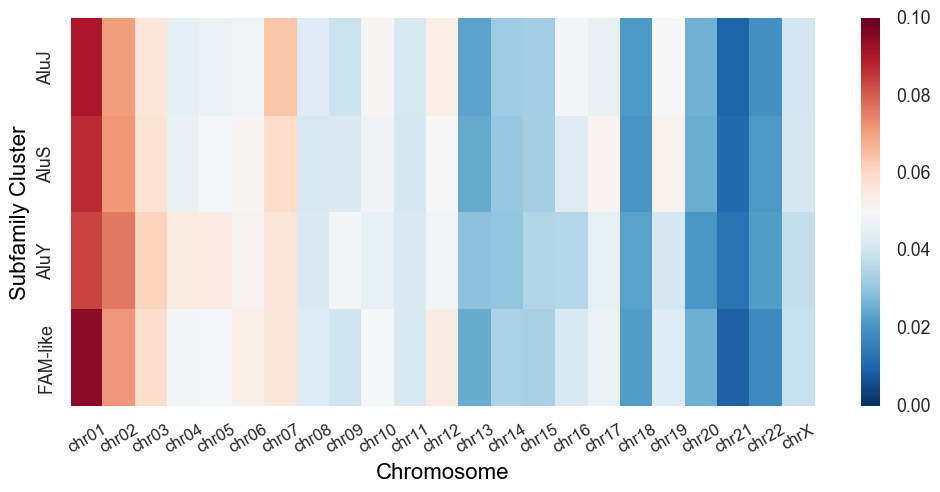

In [43]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.4})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,5))   
sns.heatmap(pivot_ratio, annot=False, linewidths=0, ax=ax, vmin=0, center=round(center_heat,2))
ax.axes.set_ylabel("Subfamily Cluster",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Chromosome",size = 16,color="black",alpha=1)

for label in ax.axes.get_xticklabels():
    label.set_text(label.get_text().replace('name-', ''))
    
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(), rotation=30, size=12)
#ax.axes.set_ylim(0,600)

In [44]:
chrom_sizes = pd.read_table('../download/genome/hg19_reduced.genome', header=None)
chrom_sizes.columns = ['chrom', 'size']
chrom_sizes = chrom_sizes.query('chrom in @chroms')
chrom_sizes['chrom_name'] = chrom_sizes.apply(lambda row: label_chrom(row), axis=1)
chrom_sizes['genome_ratio'] = chrom_sizes['size'] / np.sum(chrom_sizes['size'])

In [45]:
np.sum(chrom_sizes['size'])

3036303846

In [46]:
pivot2 = pivot.copy()
pivot.name['chr01']

cluster
AluJ        26361
AluS        59228
AluY        11469
FAM-like     5937
Name: chr01, dtype: int64

In [47]:
pivot2

name                                                          \
chrom_name  chr01  chr02  chr03  chr04  chr05  chr06  chr07  chr08  chr09   
cluster                                                                     
AluJ        26361  20637  16261  13156  13560  13978  18609  12657  11284   
AluS        59228  48551  38730  31355  33603  34162  40463  28284  28799   
AluY        11469  10435   8410   7506   7470   7082   7703   5772   6619   
FAM-like     5937   4507   3674   3070   3090   3311   3528   2684   2504   

                   ...                                                     \
chrom_name  chr10  ...    chr14  chr15  chr16  chr17  chr18  chr19  chr20   
cluster            ...                                                      
AluJ        14696  ...     9233   9519  14083  13505   6174  14539   7544   
AluS        32336  ...    21075  22382  29647  34724  13823  35133  17122   
AluY         6202  ...     4115   4803   4821   6243   3140   5644   2846   
FAM-like     3085  ...     2129   2083   2611   2905   1372   2696   1597   

                                
chrom_name chr21  chr22   chrX  
cluster                         
AluJ        2803   5753  11907  
AluS        7391  14458  27958  
AluY        1785   3033   5130  
FAM-like     566   1145   2405  

[4 rows x 23 columns]

In [48]:
pivot_ratio.name['chr02']  * chrom_sizes.query('chrom_name == "chr02"')['genome_ratio'].reset_index(drop=True).get_value(0)

cluster
AluJ        0.005687
AluS        0.005738
AluY        0.006117
FAM-like    0.005781
Name: chr02, dtype: float64

In [49]:
pivot_trans = pd.DataFrame()
for chrom_name in pivot2.columns.get_level_values('chrom_name').values:
    obj = pivot2.name[chrom_name] * chrom_sizes.query('chrom_name == @chrom_name')['genome_ratio'].reset_index(drop=True).get_value(0)
    if pivot_trans.size == 0:
        pivot_trans = pd.DataFrame(obj).T
    else:
        pivot_trans = pivot_trans.append(pd.DataFrame(obj).T)
#pivot_chrom_ratio = pivot_trans.T

In [50]:
pivot_trans.head()

cluster,AluJ,AluS,AluY,FAM-like
chr01,2163.978295,4862.035069,941.491866,487.369187
chr02,1652.965485,3888.798143,835.814064,360.997986
chr03,1060.513999,2525.902908,548.485501,239.611859
chr04,828.252304,1973.992930,472.549543,193.275659
chr05,807.959628,2002.202609,445.092804,184.114694


In [51]:
for value in pivot_trans.columns.get_level_values('cluster').values:
    pivot_trans[value] = pivot_trans[value] / np.sum(pivot_trans[value])

pivot_ratio = pivot_trans.T

In [52]:
max_ratio = np.max([np.max(pivot_trans['AluJ']),
        np.max(pivot_trans['AluS']),
        np.max(pivot_trans['AluY']),
        np.max(pivot_trans['FAM-like'])])

center_heat = max_ratio / 2
round(center_heat,2)

0.080000000000000002

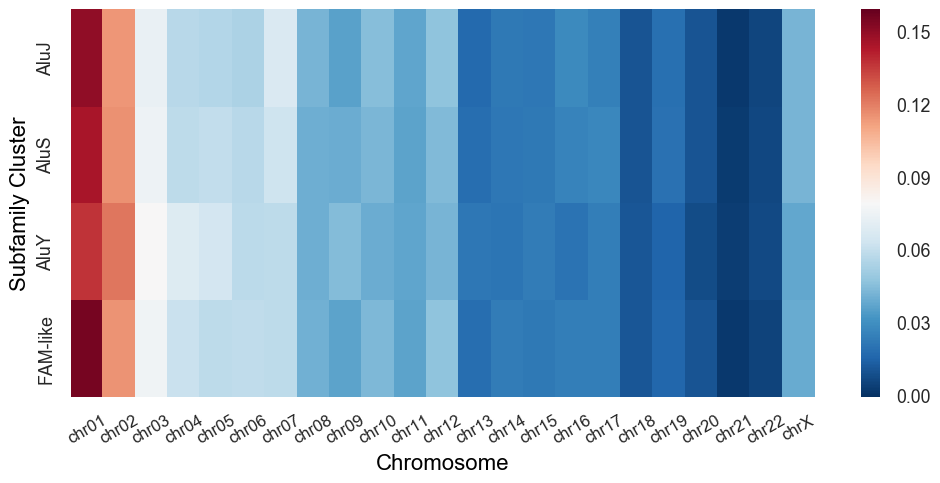

In [53]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.4})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,5))   
sns.heatmap(pivot_ratio, annot=False, linewidths=0, ax=ax, vmin=0, center=round(center_heat,2))
ax.axes.set_ylabel("Subfamily Cluster",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Chromosome",size = 16,color="black",alpha=1)

for label in ax.axes.get_xticklabels():
    label.set_text(label.get_text().replace('name-', ''))
    
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(), rotation=30, size=12)
#ax.axes.set_ylim(0,600)

In [54]:
pivot = pd.pivot_table(repeat_bed_df, index=["cluster"], values=["size"], columns=["chrom_name"], aggfunc=np.sum)

In [55]:
pivot3 = pivot.copy()
pivot_trans = pd.DataFrame()
for chrom_name in pivot3.columns.get_level_values('chrom_name').values:
    obj = pivot3['size'][chrom_name] / chrom_sizes.query('chrom_name == @chrom_name')['size'].reset_index(drop=True).get_value(0)
    if pivot_trans.size == 0:
        pivot_trans = pd.DataFrame(obj).T
    else:
        pivot_trans = pivot_trans.append(pd.DataFrame(obj).T)
pivot_ratio = pivot_trans.T

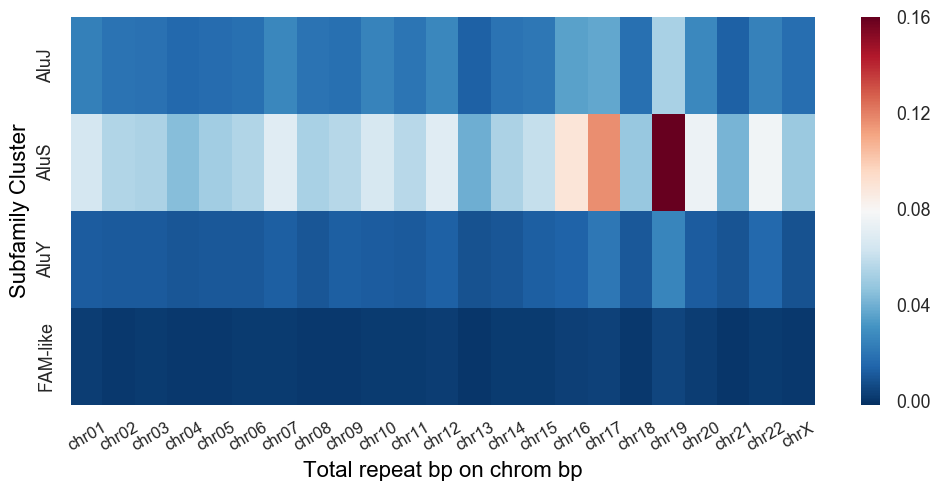

In [56]:
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.4})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,5))   
sns.heatmap(pivot_ratio, annot=False, linewidths=0, ax=ax, vmin=0, center=round(center_heat,2))
ax.axes.set_ylabel("Subfamily Cluster",size = 16,color="black",alpha=1)
ax.axes.set_xlabel("Total repeat bp on chrom bp",size = 16,color="black",alpha=1)

for label in ax.axes.get_xticklabels():
    label.set_text(label.get_text().replace('name-', ''))
    
ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(), rotation=30, size=12)
#ax.axes.set_ylim(0,600)

## Alu distances

In [57]:
def compute_centers(df):
    df_center = df.copy()
    df_center['centered_locus'] = round(
        (df_center['end'] - df_center['start'])/2 
        + df_center['start']).astype(int)
    
    return df_center

In [58]:
repeat_cores_bed_df = compute_centers(repeat_bed_df)
repeat_cores_bed_df['start'] = repeat_cores_bed_df['centered_locus']
repeat_cores_bed_df['end'] = repeat_cores_bed_df['centered_locus'] + 1

In [59]:
aluS_df = repeat_cores_bed_df.query("cluster=='AluS'")
aluJ_df = repeat_cores_bed_df.query("cluster=='AluJ'")
aluY_df = repeat_cores_bed_df.query("cluster=='AluY'")
aluFAM_df = repeat_cores_bed_df.query("cluster=='FAM-like'")


In [60]:
aluS_cores_bed = BedTool().from_dataframe(aluS_df[['chrom', 'start', 'end', 'name', 'score', 'strand']]).sort()
aluJ_cores_bed = BedTool().from_dataframe(aluJ_df[['chrom', 'start', 'end', 'name', 'score', 'strand']]).sort()
aluY_cores_bed = BedTool().from_dataframe(aluY_df[['chrom', 'start', 'end', 'name', 'score', 'strand']]).sort()
aluFAM_cores_bed = BedTool().from_dataframe(aluFAM_df[['chrom', 'start', 'end', 'name', 'score', 'strand']]).sort()

In [62]:
aluS_closeness = aluS_cores_bed.closest(aluS_cores_bed, D='a', io=True, t='first')
aluJ_closeness = aluJ_cores_bed.closest(aluJ_cores_bed, D='a', io=True, t='first')
aluY_closeness = aluY_cores_bed.closest(aluY_cores_bed, D='a', io=True, t='first')
aluFAM_closeness = aluFAM_cores_bed.closest(aluFAM_cores_bed, D='a', io=True, t='first')

In [63]:
aluS_closeness.count()

677693

In [64]:
aluS_cores_bed.count()

677693

In [65]:
def build_closeness_df(closeness):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand', 
                                          'close_chrom', 'close_start','close_end', 'close_name', 'close_score', 'close_strand',
                                          'distance']
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = closeness_df.query("distance > 0")
    return closeness_df

In [141]:
import warnings
warnings.filterwarnings('ignore')

aluS_closeness_df = build_closeness_df(aluS_closeness)
aluJ_closeness_df = build_closeness_df(aluJ_closeness)
aluY_closeness_df = build_closeness_df(aluY_closeness)
aluFAM_closeness_df = build_closeness_df(aluFAM_closeness)

In [118]:
freq_aluS, base = np.histogram(aluS_closeness_df['distance'], bins=1000)
freq_aluJ, base_aluJ = np.histogram(aluJ_closeness_df['distance'], bins=base)
freq_aluY, base_aluY = np.histogram(aluY_closeness_df['distance'], bins=base)
freq_aluFAM, base_aluFAM = np.histogram(aluFAM_closeness_df['distance'], bins=base)

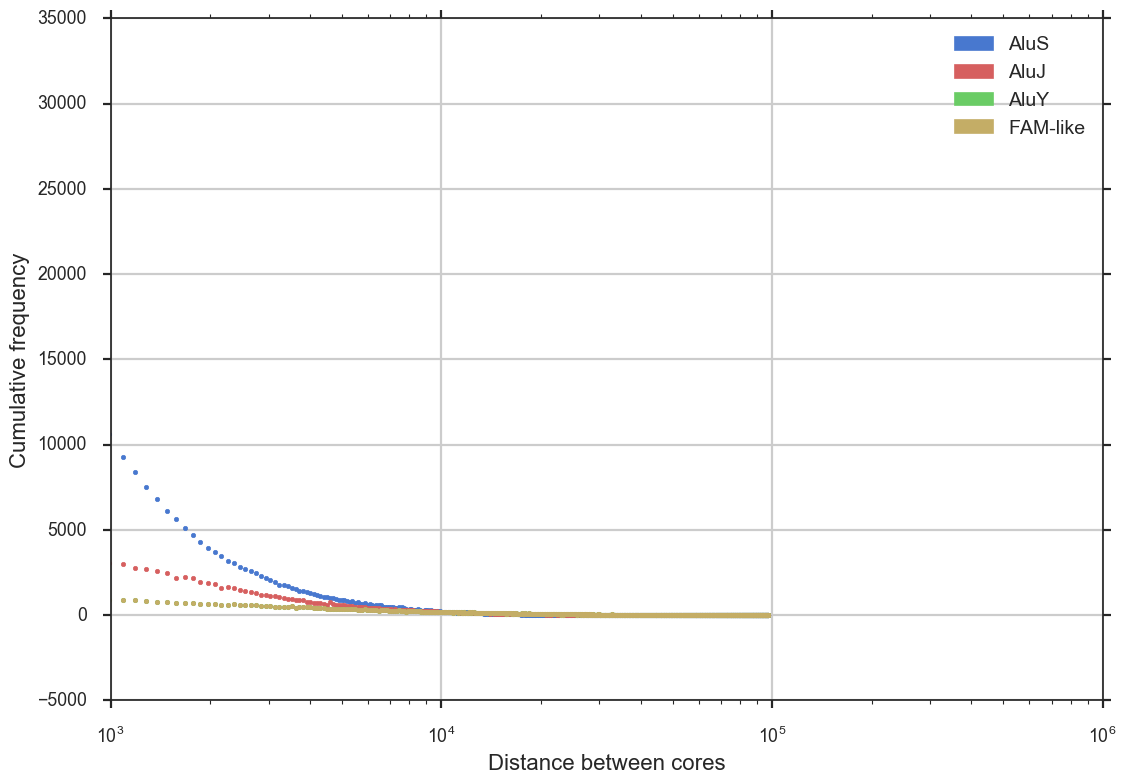

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
'''
g1 = plt.plot(base[:-1], np.cumsum(freq_aluS), 'bo', 
              base[:-1], np.cumsum(freq_aluJ), 'r', 
              base[:-1], np.cumsum(freq_aluY), 'g', 
              base[:-1], np.cumsum(freq_aluFAM), 'y')
'''
g1 = plt.scatter(base[:-1], freq_aluS, color='b', s=10)
g2 = plt.scatter(base_aluJ[:-1], freq_aluJ, color='r', s=10)
g3 = plt.scatter(base_aluY[:-1], freq_aluY, color='g', s=10)
g4 = plt.scatter(base_aluFAM[:-1], freq_aluY, color='y', s=10)

#ax.axes.set_yscale('log')
ax.axes.set_xscale('log')
ax.axes.set_xlim(1000,)

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Cumulative frequency', size=16)
ax.set_xlabel('Distance between cores', size=16)

blue_patch = mpatches.Patch(color='b', label='AluS')
red_patch = mpatches.Patch(color='r', label='AluJ')
green_patch = mpatches.Patch(color='g', label='AluY')
yellow_patch = mpatches.Patch(color='y', label='FAM-like')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

#print(st.ks_2samp(cumulative, cumulative_null))
#print(st.ks_2samp(cumulative, cumulative_null_2))
#print(st.ks_2samp(cumulative, cumulative_null_3))

In [221]:
def plot_closeness(closeness_df, bins=100, use_cumulative=False, normalize=False, use_chroms_in=[], xmin=0):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats as st
    import matplotlib.patches as mpatches
    #import matplotlib.pyplot as plt
    %matplotlib inline
    
    #sns.set(style="white", palette="muted", color_codes=True)
    sns.set(style="ticks", palette="muted", color_codes=True)
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    if len(use_chroms_in) == 0:
        chroms = closeness_df['chrom'].unique()
    else:
        chroms = use_chroms_in
    colors = sns.color_palette('muted', len(chroms)).as_hex()
    
    i = 0
    for chrom in chroms:
        freq, base = np.histogram(closeness_df.query("chrom == @chrom")['distance'], bins=bins)
        
        y = freq
        norm = np.sum(freq)
        if use_cumulative:
            y = np.cumsum(freq)
        if normalize:
            y = y / norm
        
        g1 = plt.scatter(base[:-1], y, color = colors[i], s=10)
        i = i + 1

    ax.grid()

    #sns.despine(offset=10, trim=True)

    ax.set_ylabel('Cumulative frequency', size=16)
    ax.set_xlabel('Distance between cores', size=16)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlim(xmin,)

    patches = []
    
    i = 0
    for chrom in chroms:
        patches.append(mpatches.Patch(color=colors[i], label=chrom))
        i = i + 1

    plt.legend(handles=patches, fontsize=14, loc=1)

In [233]:
# TODO use max divergences to show power laws

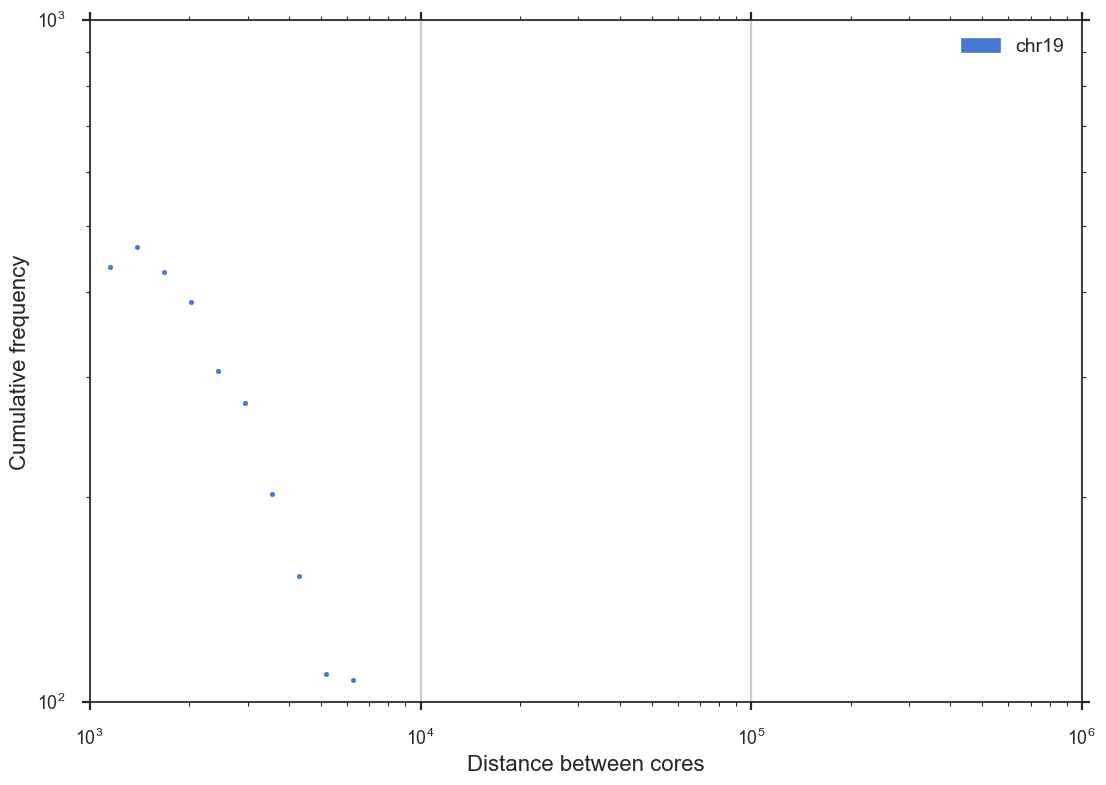

In [232]:
plot_closeness(aluJ_closeness_df, bins=np.logspace(2, 6, 50), use_cumulative=False, normalize=False, use_chroms_in=['chr19'], xmin=1000)

## Alu subfamilies in enhancer

In [240]:
def compare_null_model(counts, real_count, plot=True):
    import scipy.stats as st
    print("mean:", np.mean(counts), "std:", np.std(counts))
    if plot:
        import seaborn as sns
        %matplotlib inline

        sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [241]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [242]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [243]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [123]:
from joblib import Parallel, delayed
import multiprocessing

num_cores = multiprocessing.cpu_count()

for cluster in repeat_bed_df['cluster'].unique():
    fam_df = repeat_bed_df.query("cluster==@cluster")
    fam_bed = BedTool().from_dataframe(fam_df.drop(['size', 'subfamily'], axis=1))
    print(cluster, fam_bed.count())
    real_count = encode_bed.intersect(fam_bed, F=1).count()
    print("Intersections:", real_count)
    print(" ")
    print("Null Model 1")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    
    print(" ")
    print("Null Model 2")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    print(" ")
    print("Null Model 3")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    
    print(" ")
    print(" ")
    
    #print(encode_bed.sort().fisher(fam_bed.sort(), F=1, g=assembly_path))
    

AluS 677693
Intersections: 5075
 
Null Model 1
mean: 7804.15 std: 111.58004974
z-score: -24.4591215576 p-value: 2.01236817002e-132
 
Null Model 2
mean: 7818.75 std: 92.4160565053
z-score: -29.6891049429 p-value: 5.30782372244e-194
 
Null Model 3
mean: 7816.44 std: 86.2336732373
z-score: -31.7908294647 p-value: 4.33346823309e-222
 
 
AluJ 290680
Intersections: 2949
 
Null Model 1
mean: 3461.14 std: 62.3496623888
z-score: -8.21399796532 p-value: 1.06971604504e-16
 
Null Model 2
mean: 3454.0 std: 56.0911757766
z-score: -9.00319868514 p-value: 1.09617549525e-19
 
Null Model 3
mean: 3447.2 std: 48.4086769082
z-score: -10.2915434137 p-value: 3.84665910207e-25
 
 
AluY 136646
Intersections: 883
 
Null Model 1
mean: 1568.83 std: 38.3903777007
z-score: -17.8646327824 p-value: 1.11195387007e-71
 
Null Model 2
mean: 1561.78 std: 42.5912150566
z-score: -15.9370893528 p-value: 1.751469347e-57
 
Null Model 3
mean: 1572.96 std: 39.0880851411
z-score: -17.6514146832 p-value: 4.96194455734e-70
 
 
FAM-

In [126]:
print(792/62446, 1568/136646, 3461/290680, 7804/677693)
print(886/62446, 883/136646, 2949/290680, 5075/677693)

0.012682958075777472 0.011474905961389283 0.011906563919086281 0.011515538746895718
0.014188258655478334 0.006461952783103787 0.010145176826751066 0.007488641612057377


### Highest population subfamilies: Jo, Jb, Sx, and Y

In [237]:
subfamilies = ['AluJo', 'AluJb', 'AluSx', 'AluY']
pop_repeat_bed_df = repeat_bed_df.query("subfamily in @subfamilies")

In [244]:
from joblib import Parallel, delayed
import multiprocessing

num_cores = multiprocessing.cpu_count()

for subfamily in pop_repeat_bed_df['subfamily'].unique():
    fam_df = repeat_bed_df.query("subfamily==@subfamily")
    fam_bed = BedTool().from_dataframe(fam_df.drop(['size', 'cluster'], axis=1))
    print(subfamily, fam_bed.count())
    real_count = encode_bed.intersect(fam_bed, F=1).count()
    print("Intersections:", real_count)
    print(" ")
    print("Null Model 1")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    
    print(" ")
    print("Null Model 2")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    print(" ")
    print("Null Model 3")
    counts = []
    counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, fam_bed, assembly_path)
                                             for i in range(0, 100)))
    compare_null_model(counts, real_count, False)
    
    print(" ")
    print(" ")
    
    #print(encode_bed.sort().fisher(fam_bed.sort(), F=1, g=assembly_path))
    

AluJo 44716
Intersections: 534
 
Null Model 1
mean: 539.78 std: 26.6505459606
z-score: -0.216881110373 p-value: 0.414150499492
 
Null Model 2
mean: 540.14 std: 21.9162131766
z-score: -0.28015788816 p-value: 0.389678186892
 
Null Model 3
mean: 540.71 std: 23.8404257512
z-score: -0.281454705131 p-value: 0.389180832233
 
 
AluSx 121889
Intersections: 1084
 
Null Model 1
mean: 1414.56 std: 39.4571463743
z-score: -8.37769657401 p-value: 2.6986786379e-17
 
Null Model 2
mean: 1412.91 std: 39.4388374575
z-score: -8.33974886695 p-value: 3.72242372759e-17
 
Null Model 3
mean: 1409.63 std: 37.4073936542
z-score: -8.70496359651 p-value: 1.5883835258e-18
 
 
AluY 95398
Intersections: 585
 
Null Model 1
mean: 1089.82 std: 32.7390836769
z-score: -15.4194908136 p-value: 6.05275227869e-54
 
Null Model 2
mean: 1092.57 std: 35.8756895404
z-score: -14.1480207489 p-value: 9.60439225246e-46
 
Null Model 3
mean: 1084.09 std: 32.6478467896
z-score: -15.2870724742 p-value: 4.66243197056e-53
 
 
AluJb 114658
In

## Full Alu in enhancer

In [25]:
real_count = encode_bed.intersect(repeat_bed, F=1).count()
real_count

41

In [26]:
repeat_bed.intersect(encode_bed, f=1).count()

41

In [27]:
encode_bed.sort().fisher(repeat_bed.sort(), F=1, g=assembly_path)

<FisherOutput at 4681085616>
# Number of query intervals: 36772
# Number of db intervals: 5386
# Number of overlaps: 41
# Number of possible intervals (estimated): 1567672
# phyper(41 - 1, 36772, 1567672 - 36772, 5386, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 41           | 36731        |
# not in -a | 5345         | 1525555      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
3.927e-19	1	6.833e-19	0.319

In [28]:
encode_bed.sort().jaccard(repeat_bed.sort(), F=1, g=assembly_path)

{'intersection': 4625,
 'jaccard': 9.59232e-05,
 'n_intersections': 41,
 'union-intersection': 48215675}

### Null Model 1: shuffled enhancers

In [31]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 13634.21 std: 174.265159742
z-score: -22.0423290902 p-value: 5.65818568986e-108


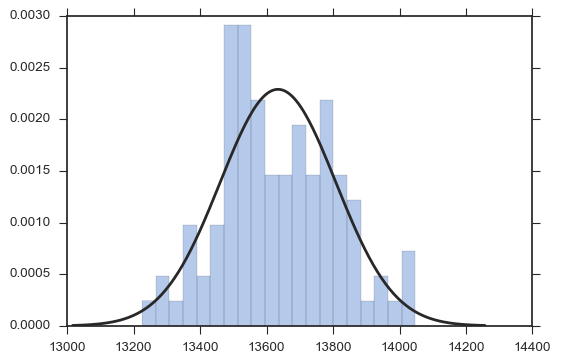

In [32]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [34]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 13635.55 std: 120.691704355
z-score: -31.8377308577 p-value: 9.7313040163e-223


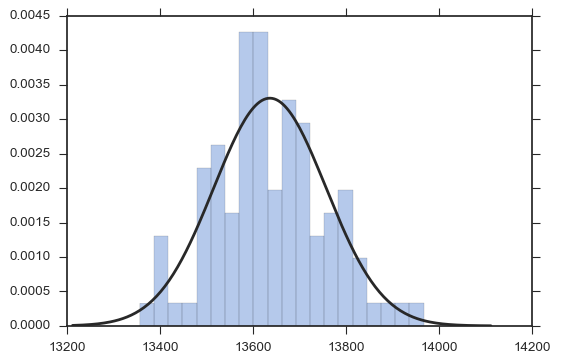

In [35]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [37]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 13637.85 std: 132.474856105
z-score: -29.023243452 p-value: 1.67479835391e-185


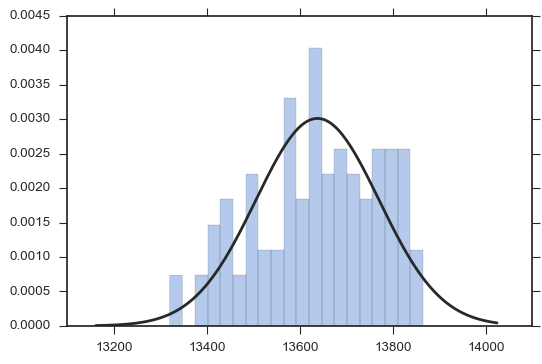

In [38]:
compare_null_model(counts, real_count)

## Counting occurences per enhancer

In [44]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [45]:
overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = encode_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [46]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [47]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [48]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

[None]

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


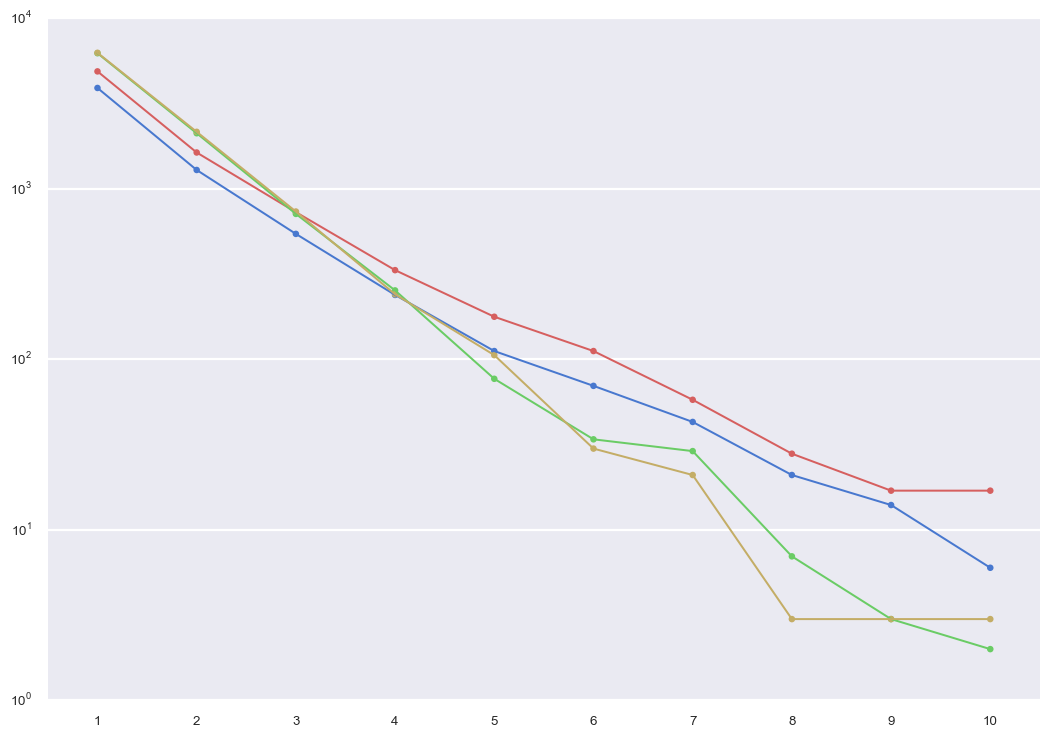

In [49]:
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")
g1 = sns.pointplot(x=occ_base[:10], y=occ_freq[:10], color='b')
g2 = sns.pointplot(x=occ_base[:10], y=occ_freq_null[:10], color='r')
g3 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_2[:10], color='g')
g4 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_3[:10], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
g1.set(yscale='log')

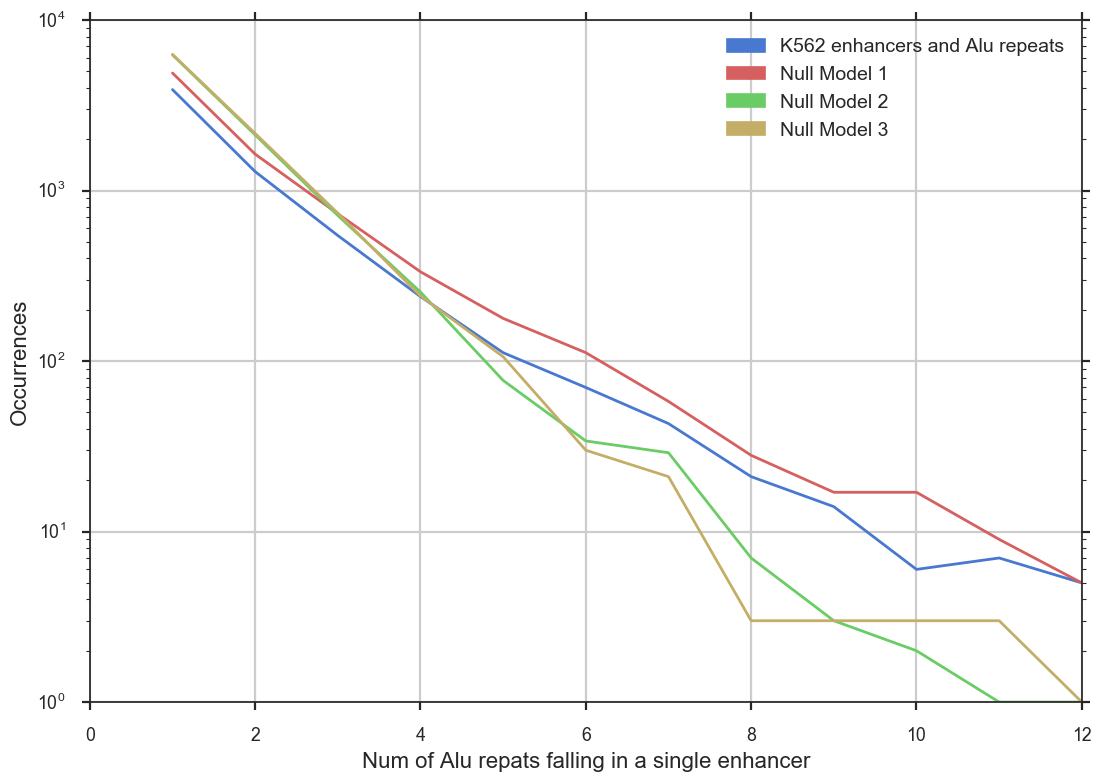

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.plot(occ_base[:12], occ_freq[:12], color='b')
g2 = plt.plot(occ_base[:12], occ_freq_null[:12], color='r')
g3 = plt.plot(occ_base[:12], occ_freq_null_2[:12], color='g')
g4 = plt.plot(occ_base[:12], occ_freq_null_3[:12], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of Alu repats falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='K562 enhancers and Alu repeats')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [46]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:10]))
print(st.expon.fit(occ_freq_null[:10]))
print(st.expon.fit(occ_freq_null_2[:10]))
print(st.expon.fit(occ_freq_null_3[:10]))

(5.9999999999810854, 619.30000415560414)
(13.999999999977749, 786.80005911623766)
(1.999999999990602, 943.00007570431035)
(0.99999999998651301, 956.40000544818349)


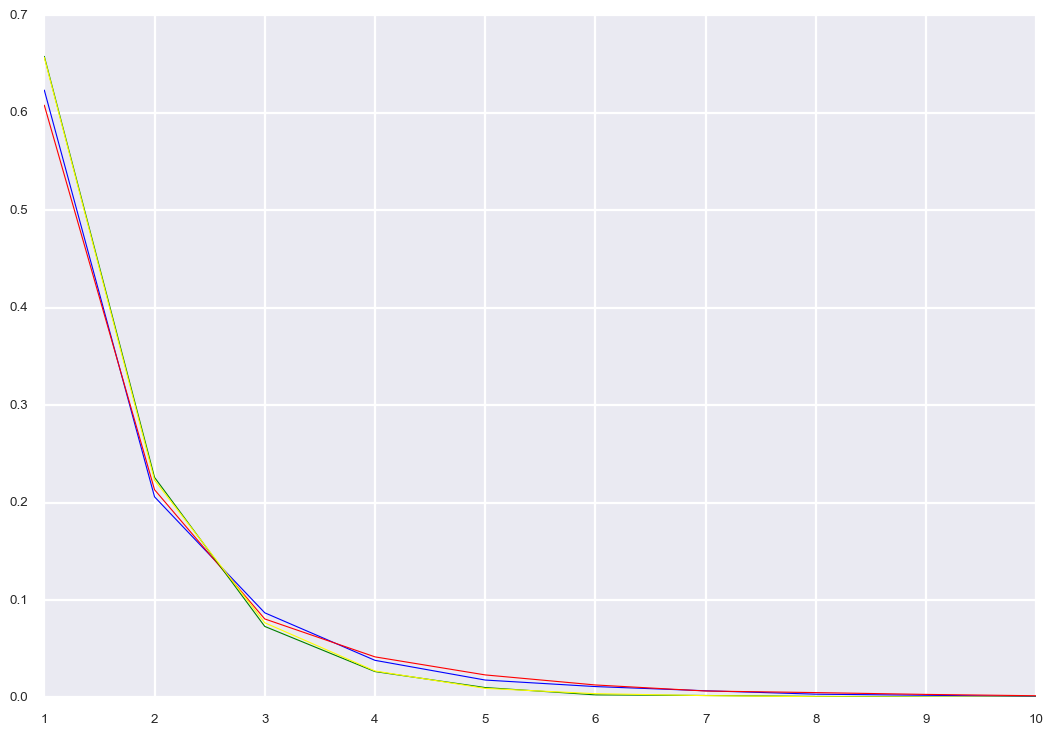

In [47]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10], c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10], c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10], c='green')
ax = plt.plot(occ_base[:10], occ_ratio_null_3[:10], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


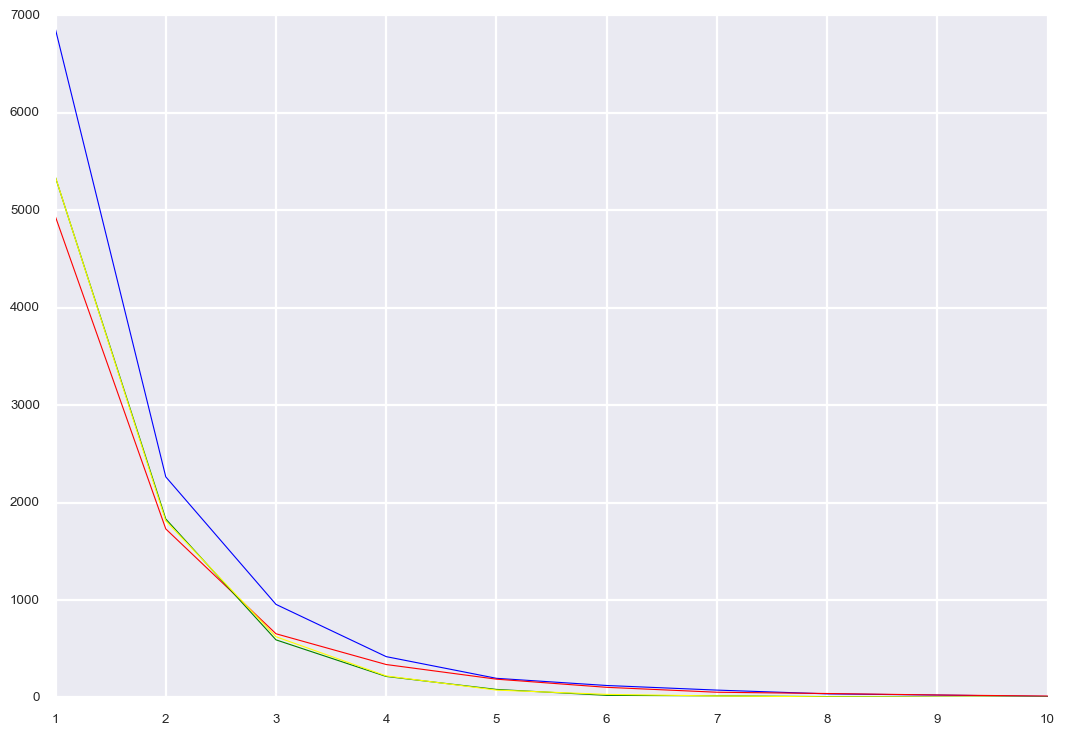

In [48]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


## Closeness distribution

In [49]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a', t='all')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [50]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [51]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

(-5000, 5000)

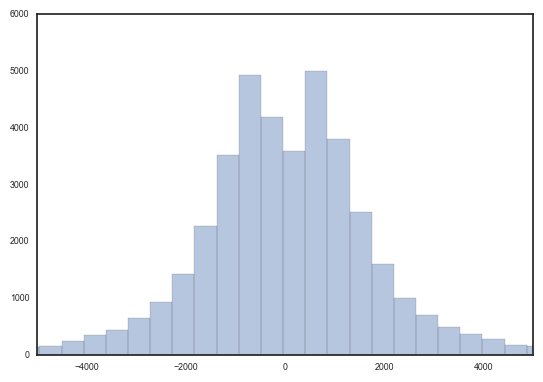

In [76]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 1 Closeness

In [53]:
encode_bed_shuffled = encode_bed.shuffle(g=assembly_path)
repeat_closeness_null_df = build_closeness_df(encode_bed_shuffled, repeat_bed)

(-300000, 300000)

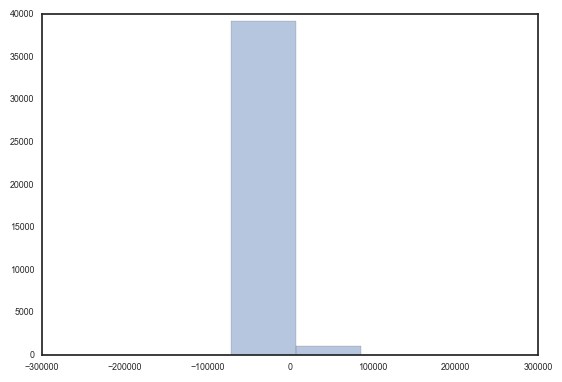

In [67]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 2 Closeness

In [55]:
repeat_bed_shuffled = repeat_bed.shuffle(g=assembly_path)
repeat_closeness_null2_df = build_closeness_df(encode_bed, repeat_bed_shuffled)

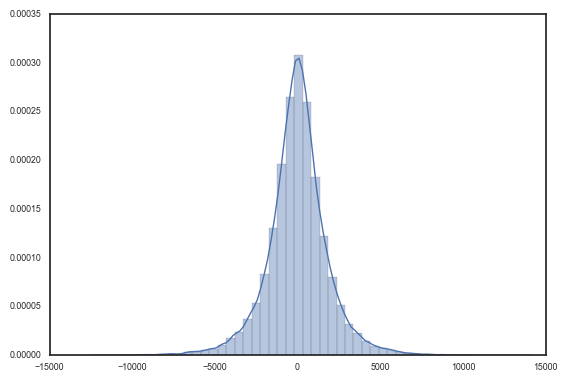

In [56]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null2_df[['centered_distance']], kde=True)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 3 Closeness

In [57]:
repeat_closeness_null3_df = build_closeness_df(encode_bed_shuffled, repeat_bed_shuffled)

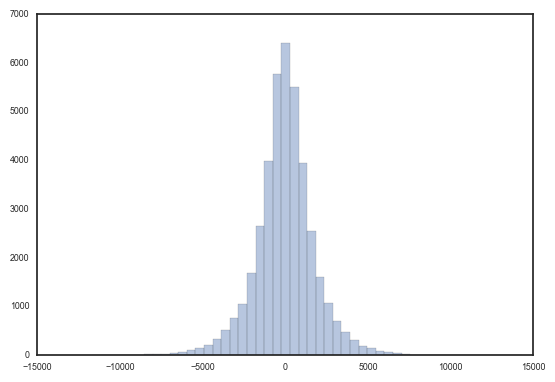

In [58]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null3_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Comparing Closeness Distributions

In [59]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null = repeat_closeness_null_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_2 = repeat_closeness_null2_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_3 = repeat_closeness_null3_df.query("centered_distance >=0")['centered_distance']

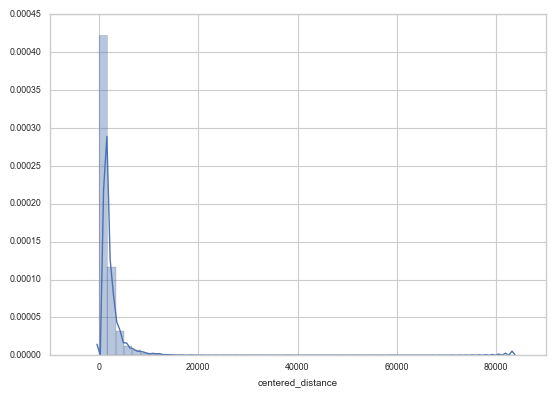

In [60]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=True)
#g1.set_xlim(0, 10000)

In [77]:
freqs, base = np.histogram(centered_distance_distribution, bins=3000)
freqs_null, base_null = np.histogram(centered_distance_distribution_null, bins=base)
freqs_null_2, base_null_2 = np.histogram(centered_distance_distribution_null_2, bins=base)
freqs_null_3, base_null_3 = np.histogram(centered_distance_distribution_null_3, bins=base)

In [78]:
cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)
cumulative_null_2 = np.cumsum(freqs_null_2) / sum(freqs_null_2)
cumulative_null_3 = np.cumsum(freqs_null_3) / sum(freqs_null_3)

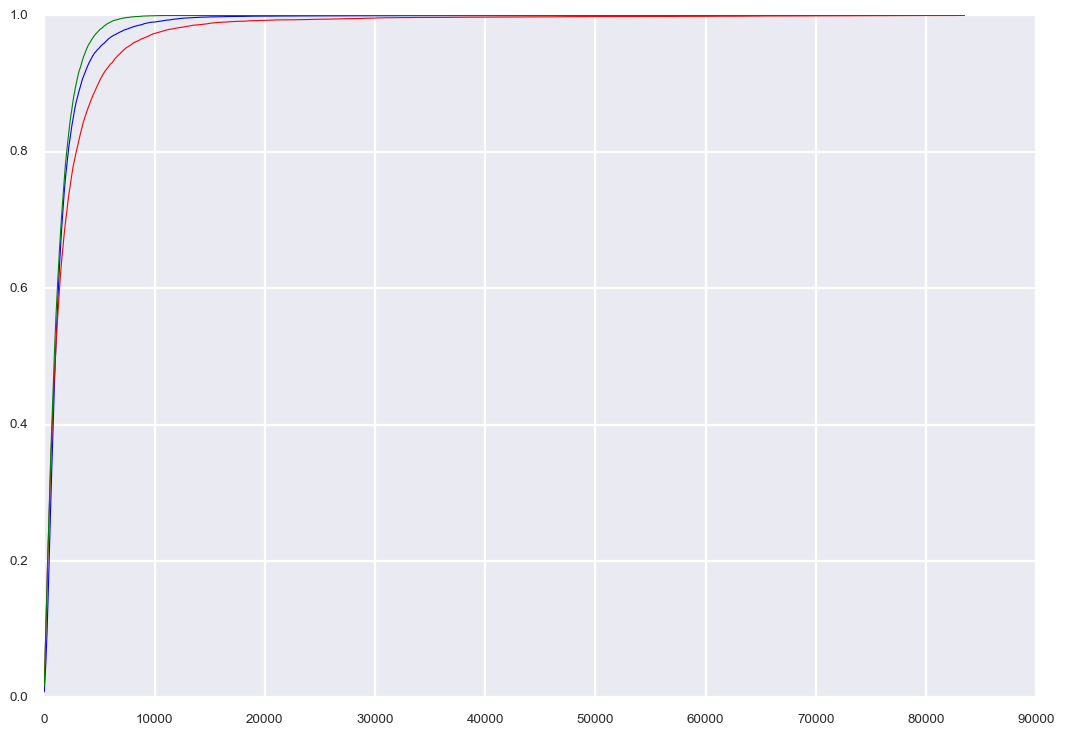

In [79]:
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")

plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.plot(base_null_2[:-1], cumulative_null_2, c='green')
#plt.plot(base_null_3[:-1], cumulative_null_3, c='yellow')
plt.show()


## Densities

In [ ]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [ ]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

In [ ]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [ ]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [ ]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [ ]:
len(distal_df)

In [ ]:
len(proximal_df)

In [ ]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

In [ ]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

In [ ]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [ ]:
genes_bed.count()

In [ ]:
genes_bed_df = genes_bed.to_dataframe()

In [ ]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [ ]:
genes_bed_df['chrom'].unique()

In [ ]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [ ]:
genes_bed.count()

In [ ]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

In [ ]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [ ]:
genic_enhancers_bed.count()

In [ ]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [ ]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

In [ ]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [ ]:
non_genic_enhancers_bed.count()

In [ ]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

In [ ]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [ ]:
enhancers_regions_bed.count()

In [ ]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [ ]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)
